### Introducción a Spark
**Spark** es un sistema de computación que se basa en Hadoop Map Reduce y que, principalmente, permite dividir o paralelizar el trabajo, ya que normalmente se instala en un clúster de máquina. La idea es que tengamos n máquinas y cada una de esas instancias va a tener instalada una versión de Apache Spark.

**Particiones**: conjunto de filas que se encuentran en una máquina del cluster. Las particiones de los DataFrames representan como están distribuidos los datos en el cluster durante la ejecución de las máquinas.   

Las **estructuras de datos** de Spark son INMUTABLES, es decir, una vez creadas ya no se pueden modificar.    
  
- **Transformaciones**: transforman un dataframe de spark en uno nuevo sin alterar los datos origiales. Por ejemplo, una transformación se lleva a cabo a través de un filter()  o un select(). Las transformaciones no son computadas inmediatamente.  
    - Existen dos tipos de transformaciones:   
        - *Narrow*: cada particion padre es utilizada, como mucho, por una particion hijo. Por ejemplo, filter() o contains() son transformaciones narrow porque pueden operar en una sola particion y devolver una particion output sin cambiar nada de los datos.    
        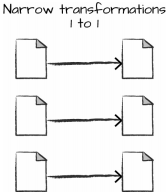
        
        - *Wide*: cada particion padre es utilizada por muchas particiones hijo. Por ejemplo, groupBy() y orderBy() utilizan particiones para leerlas, combinarlas y escribirlas en el disco.
        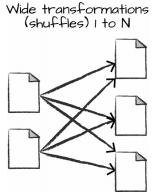
        
  
- **Lazy evaluation**: Spark espera hasta que el driver pida los resultados a través de una acción. En vez de modificar los datos directamente, espera a que se ejecute una acción sobre dicha transformación para ejecutarla. Esto aporta beneficios a Spark porque puede optomizar la entrada de los datos.

- **Acciones**: son operaciones y funciones que se llevan a cabo sobre una transformacion. Ejemplos de acciones pueden ser un count(), show(), take(), etc.
    - Existen tres tipos de acciones:
        - Acciones para mostrar datos en la consola
        - Acciones para coleccionar datos en objetos nativos en los respectivos lenguajes
        - Acciones para escribir en fuentes de salida de datos
        
**Spark UI:** podemos observar como se ejecutan los jobs a través de http://localhost:4040.        
Dispone de informacion sobre el estado de los jobs, su entorno y el estado del cluster.  

**Crear un DataFrame a partir de un csv**   
Cuando creamos un DF a partir de un csv sin definir de forma previa el esquema de estos datos, estamos ejecutando una transformación, ya que Spark solo lee las primeras filas del documento para establecer el tipo de datos que hay en cada fila.
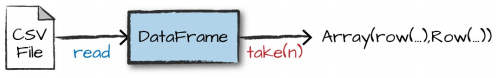


------------------------------------------------------

### SCALA

In [1]:
//Creacion DataFrame
val myRange = spark.range(1000).toDF("number")

Intitializing Scala interpreter ...

Spark Web UI available at http://EM2021002836.bosonit.local:4042
SparkContext available as 'sc' (version = 3.1.1, master = local[*], app id = local-1622800305181)
SparkSession available as 'spark'


myRange: org.apache.spark.sql.DataFrame = [number: bigint]


In [2]:
//Transformacion
val divisBy2 = myRange.where("number % 2 = 0")

divisBy2: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [number: bigint]


In [3]:
//Accion
divisBy2.count()

res0: Long = 500


In [4]:
//Crear un dataframe a traves de una base de datos con el esquema predefinido
val flightData2015 = spark
.read
.option("inferSchema", "true")
.option("header", "true")
.csv("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.csv")

flightData2015: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]


In [5]:
//Visualizar el esquema de los datos
flightData2015.schema

res1: org.apache.spark.sql.types.StructType = StructType(StructField(DEST_COUNTRY_NAME,StringType,true), StructField(ORIGIN_COUNTRY_NAME,StringType,true), StructField(count,IntegerType,true))


In [6]:
//accion
flightData2015.take(3)

res2: Array[org.apache.spark.sql.Row] = Array([United States,Romania,15], [United States,Croatia,1], [United States,Ireland,344])


In [7]:
//Con la función explain observamos de donde viene nuestro df
flightData2015.sort("count").explain()

== Physical Plan ==
*(1) Sort [count#28 ASC NULLS FIRST], true, 0
+- Exchange rangepartitioning(count#28 ASC NULLS FIRST, 200), ENSURE_REQUIREMENTS, [id=#57]
   +- FileScan csv [DEST_COUNTRY_NAME#26,ORIGIN_COUNTRY_NAME#27,count#28] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex[file:/C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/20..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string,ORIGIN_COUNTRY_NAME:string,count:int>




In [8]:
//Configurar el numero de particiones que se van a hacer cuando haya un shuffle
spark.conf.set("spark.sql.shuffle.partitions", 5)

In [9]:
//trnasformacion wide + accion
flightData2015.sort("count").take(2)

res5: Array[org.apache.spark.sql.Row] = Array([United States,Singapore,1], [Moldova,United States,1])


----------------------------------------------------------------------------------------------------------------------------

### PYTHON

In [1]:
##Creacion DataFrame
myRange = spark.range(1000).toDF("number")

In [2]:
##Transformacion
divisBy2 = myRange.where("number % 2 = 0")

In [3]:
##Accion
divisBy2.count()

500

In [4]:
##Crear un DF a partir de una base de datos con un esquema predefinido
flightData2015 = spark\
.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv("C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/2015-summary.csv")

In [5]:
##Accion sobre el DF
flightData2015.take(3)

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344)]

In [6]:
##La funcion explain nos indica de donde viene nuestro DF
flightData2015.sort("count").explain()

== Physical Plan ==
*(1) Sort [count#28 ASC NULLS FIRST], true, 0
+- Exchange rangepartitioning(count#28 ASC NULLS FIRST, 200), ENSURE_REQUIREMENTS, [id=#57]
   +- FileScan csv [DEST_COUNTRY_NAME#26,ORIGIN_COUNTRY_NAME#27,count#28] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex[file:/C:/Users/nerea.gomez/Documents/Documentacion/Definitive Guide/Datasets/20..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string,ORIGIN_COUNTRY_NAME:string,count:int>




In [7]:
##Configurar el numero de particiones cuando haya un shuffle
spark.conf.set("spark.sql.shuffle.partitions", "5")

In [8]:
##transformacion wide + accion
flightData2015.sort("count").take(2)

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Singapore', count=1),
 Row(DEST_COUNTRY_NAME='Moldova', ORIGIN_COUNTRY_NAME='United States', count=1)]